# Subtask 1:
## Statistics

In [4]:
import pandas as pd         # data handling
#import matplotlib           # histogram plotting
import matplotlib.pyplot as plt

candidatesFileName = 'files/candidates_V2.csv'
#candidatesnp = np.genfromtxt('.candidates_V2.csv', delimiter=',', dtype=None, skip_header=0)
candidates = pd.read_csv(candidatesFileName)

candidates

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,52.946688,-92.688873,-241.067872,0
...,...,...,...,...,...
754970,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-33.400000,-64.200000,-115.560000,0
754971,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,56.236359,70.352400,-203.446236,0
754972,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-97.104221,55.738289,-203.879785,0
754973,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-65.470000,59.670000,-136.370000,0


The total number of scans is 754975.
There are 888 different UIDs.
There are 753418 non nodules and 1557 nodules.


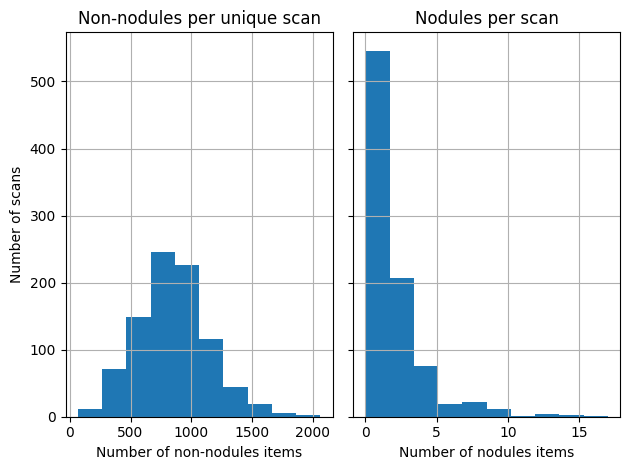

In [5]:
print("The total number of scans is " + str(len(candidates)) + ".")
print("There are " + str(candidates['seriesuid'].nunique()) + " different UIDs.")
nNonnodules = str(candidates['class'].value_counts()[0])
nNodules = str(candidates['class'].value_counts()[1])
print("There are " + nNonnodules + " non nodules and " +
      nNodules + " nodules.")

counts = candidates.groupby(['seriesuid', 'class']).size().unstack(fill_value=0)
#counts.hist(legend=True)

fig, axes = plt.subplots(1, 2, sharey=True)
counts[0].hist( ax=axes[0])
axes[0].set_title('Non-nodules per unique scan')
axes[0].set_xlabel('Number of non-nodules items')
axes[0].set_ylabel('Number of scans')

counts[1].hist( ax=axes[1])
axes[1].set_title('Nodules per scan')
axes[1].set_xlabel('Number of nodules items')

plt.tight_layout()
plt.show()

## Loading

In [6]:
import numpy as np
import itk



scan_path = "files/subset/scans/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd"
mhd_data = itk.imread(scan_path)
mhd_data
# convert to numpy array
scan = np.array(itk.GetArrayFromImage(mhd_data), dtype=np.float32)
scan.clip(-1000, 1000, scan)  # clip to reasonable HU values

origin_xyz = mhd_data.GetOrigin()
voxel_size_xyz = mhd_data.GetSpacing()
direction_matrix = np.array(mhd_data.GetDirection()).reshape(3, 3)

matchingc = candidates[candidates['seriesuid'] == "1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860"]
nodulecandidates = matchingc[matchingc['class'] == 1]

for i in nodulecandidates:
    voxel_coord = i['coordX', 'coordY', 'coordZ']

voxel_coord = 0 # TODO

patient_coord = origin_xyz + voxel_size_xyz * (direction_matrix @ voxel_coord)


__array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword


TypeError: string indices must be integers, not 'tuple'

In [7]:
matchingc = candidates[candidates['seriesuid'] == "1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860"]
nodulecandidates = matchingc[matchingc['class'] == 1]

#nodulecandidates['coordX', 'coordY', 'coordZ']
nodulecandidates.iterrows
for (_,i) in nodulecandidates.iterrows():
    #print(type(i))
    #print(i)
    voxel_coord = i.loc[['coordX', 'coordY', 'coordZ']].to_numpy(dtype=np.float32)
    print(voxel_coord)


[ 104.08393 -211.75583 -227.01799]
[-128.98209 -175.17679 -298.5102 ]
